<a href="https://colab.research.google.com/github/scnatalia/Inteligencia-Computacional/blob/main/Iris2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris=load_iris()

In [3]:
X = iris['data']
Y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [4]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)

In [8]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, batch_size=10)

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


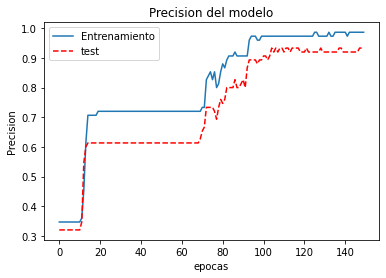

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Precision del modelo')
plt.ylabel('Precision')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/IC-800/Iris/Iris_bincros_trss_adam_accu.png',dpi=300) 
plt.show()

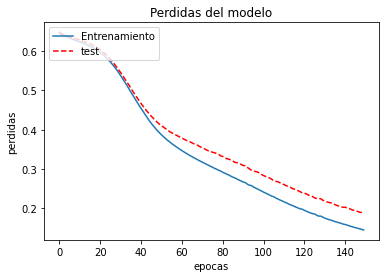

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/IC-800/Iris/Iris_bincros_trss-tanh_loss.png',dpi=300)
plt.show()

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________
